# <center>Computational Literary Science: Exam Project<center> <center>Classroom of the Elite: A Data-Driven Content Analysis<center>

## CotE Data

In [1]:
import sys
print("Python version:")
print (sys.version)

print("\n Version info:")
print (sys.version_info)

Python version:
3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]

 Version info:
sys.version_info(major=3, minor=9, micro=12, releaselevel='final', serial=0)


In [2]:
#Imports

import random
import glob
import shutil

import pandas as pd
print(pd.__version__)

import numpy as np
print(np.__version__)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-deep')

import sklearn 
print(sklearn.__version__)

import nltk
print(nltk.__version__)
from nltk import pos_tag

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import os

RND = 22
np.random.seed(RND)
random.seed(RND)

1.4.2
1.21.5
1.0.2
3.7


In [3]:
data_path_CotE = "C:/Users/morin/OneDrive/Documents/School/CLS-Classroom_of_the_Elite/Presentation/CotE_DatasetNaN.txt"

In [4]:
df = pd.read_csv(data_path_CotE, sep = "\t", encoding = "UTF-8")

In [5]:
df.head()

,ID,Volume,Volume_Type,Chapter_Type,Chapter_Num,PublishingDate_Original,Title,Text,Translator,Editor,Proofreader,Trimester
0,1_P,1.0,Main,Prologue,0.0,2015-05-25,The structure of Japanese society,"It s a bit sudden, but listen seriously to ...",qbomb,NaN,NaN,1
1,1_1,1.0,Main,Chapter,1.0,2015-05-25,Welcome to my dream-like school life,"Ayanokouji-kun, are you ok? It came. It...",qbomb,NaN,NaN,1
2,1_2,1.0,Main,Chapter,2.0,2015-05-25,The students of class D,"On the second day of school, even though it...",qbomb,NaN,NaN,1
3,1_3,1.0,Main,Chapter,3.0,2015-05-25,"Ladies and gentlemen, thanks for waiting!",Good morning Yamauchi! Good morning Ike! Wh...,qbomb,NaN,NaN,1
4,1_4,1.0,Main,Chapter,4.0,2015-05-25,Friend,"Kikyou-chan, do you want to stop by a cafe...",qbomb,NaN,NaN,1


## PreProcessing

In [6]:
#Removing Punctuation and Stopwords

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = stopwords.words('english')
#le=WordNetLemmatizer()

def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x


df['Clean_Text'] = df.Text.apply(clean_text)
df['Clean_Text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\morin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\morin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\morin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    bit sudden listen seriously question ask think...
1    ayanokouji kun ok came came feared situation p...
2    second day school even though technically firs...
3    good morning yamauchi good morning ike arrivin...
4    kikyou chan want stop cafe way home un let go ...
Name: Clean_Text, dtype: object

In [7]:
df["Text_Len"] = df["Text"].apply(len)
df["Text_Len"]

0        2680
1       58100
2       23881
3       22311
4       18958
        ...  
171     56568
172     72295
173     85384
174    104494
175     12526
Name: Text_Len, Length: 176, dtype: int64

In [8]:
max(df["Text_Len"]) #176240

176240

In [9]:
df["Clean_Text_Len"] = df["Clean_Text"].apply(len)
df["Clean_Text_Len"]

0       1580
1      34181
2      13923
3      13611
4      11194
       ...  
171    32211
172    43332
173    51513
174    58903
175     7422
Name: Clean_Text_Len, Length: 176, dtype: int64

In [10]:
max(df["Clean_Text_Len"]) #104346

104346

In [11]:
#Splitting up the dataframe into pretraining data and actual data
df_pretrainCotE1 = df[df["Chapter_Type"] == "Bonus"]
df_pretrainCotE2 = df[df["Chapter_Type"] == "Afterword"]
df_pretrainCotE = df_pretrainCotE1.append(df_pretrainCotE2, ignore_index=True)
df_pretrainCotE.head()

C:\Users\morin\AppData\Local\Temp\ipykernel_4540\3295641952.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pretrainCotE = df_pretrainCotE1.append(df_pretrainCotE2, ignore_index=True)


,ID,Volume,Volume_Type,Chapter_Type,Chapter_Num,PublishingDate_Original,Title,Text,Translator,Editor,Proofreader,Trimester,Clean_Text,Text_Len,Clean_Text_Len
0,4.5_B,4.5,Sub,Bonus,33.0,2016-09-23,"The Summer Vacation of Ike Kanji, Yamauchi ...",Part_1 It would concern the difference b...,Anon from 4chan,NaN,NaN,Vacation,part would concern difference genders speaking...,38339,22362
1,7.5_B,7.5,Sub,Bonus,61.0,2018-01-25,The Cupid Karuizawa,"At last it s the 25th, and the double date ...",Anon from 4chan,NaN,NaN,Vacation,last th double date started order faithfully c...,10837,6247
2,10_B1,10.0,Main,Bonus,NaN,2019-01-25,Ichinose Honami Short Story: Apparent Diffi...,A short distance from the dorms. I was stan...,"Graze, Regular Days, Hina, Liam, and Alice (Ci...","christmas_cavalier, Graze, Catalystic, Regular...",NaN,3,short distance dorms standing shadow vending m...,3227,2000
3,10_B2,10.0,Main,Bonus,NaN,2019-01-25,Horikita Suzune Short Story: Neighbour,He walked past me and stood in front of Kou...,"Graze, Regular Days, Hina, Liam, and Alice (Ci...","christmas_cavalier, Graze, Catalystic, Regular...",NaN,3,walked past stood front kouenji kun seems talk...,3063,1823
4,10_B3,10.0,Main,Bonus,NaN,2019-01-25,Sakayanagi Arisu Short Story,A space for only me and Ayanokouji was spre...,"Graze, Regular Days, Hina, Liam, and Alice (Ci...","christmas_cavalier, Graze, Catalystic, Regular...",NaN,3,space ayanokouji spreading eyes wearing usual ...,2497,1423


In [12]:
df_CotE1 = df[df["Chapter_Type"] == "Prologue"]
df_CotE2 = df[df["Chapter_Type"] == "Chapter"]
df_CotE3 = df[df["Chapter_Type"] == "Epilogue"]
df_CotE = df_CotE1.append(df_CotE2, ignore_index=True)
df_CotE = df_CotE.append(df_CotE3, ignore_index=True)
df_CotE.head()

C:\Users\morin\AppData\Local\Temp\ipykernel_4540\1056833379.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_CotE = df_CotE1.append(df_CotE2, ignore_index=True)
C:\Users\morin\AppData\Local\Temp\ipykernel_4540\1056833379.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_CotE = df_CotE.append(df_CotE3, ignore_index=True)


,ID,Volume,Volume_Type,Chapter_Type,Chapter_Num,PublishingDate_Original,Title,Text,Translator,Editor,Proofreader,Trimester,Clean_Text,Text_Len,Clean_Text_Len
0,1_P,1.0,Main,Prologue,0.0,2015-05-25,The structure of Japanese society,"It s a bit sudden, but listen seriously to ...",qbomb,NaN,NaN,1,bit sudden listen seriously question ask think...,2680,1580
1,2_P,2.0,Main,Prologue,12.0,2015-09-25,The monologue of Sakura Airi,I’m not very good at interacting with other...,qbomb,Candy-Sama,Josh-kun,1,good interacting people good talking people m...,1202,669
2,3_P,3.0,Main,Prologue,16.0,2016-01-25,Chiyabashira Sae s monologue,There are many stories in Greek Mythology t...,black_miri,NaN,NaN,1,many stories greek mythology include human sus...,2585,1542
3,4_P,4.0,Main,Prologue,22.0,2016-05-25,Karuizawa Kei s Monologue,"In the end, even after I entered this schoo...",Anon from 4chan,NaN,NaN,1,end even entered school nothing changed perhap...,1713,909
4,4.5_P,4.5,Sub,Prologue,27.0,2016-09-23,Even so the Summer Vacation heads towards i...,Sazae-san syndrome. I wonder if you ve hear...,Anon from 4chan,NaN,NaN,Vacation,sazae san syndrome wonder heard word explain s...,1801,1057


## Pretraining Data

In [13]:
#Defining the CotE Bonus Chapters and Afterwords pretraining data (1)
df_pretrainCotE = df_pretrainCotE[["Clean_Text"]]
df_pretrainCotE.head()

,Clean_Text
0,part would concern difference genders speaking...
1,last th double date started order faithfully c...
2,short distance dorms standing shadow vending m...
3,walked past stood front kouenji kun seems talk...
4,space ayanokouji spreading eyes wearing usual ...


In [14]:
#Defining the Project Gutenberg, School Stories Bookshelf pretraining data (2)
data_path_gutenberg = "C:/Users/morin/OneDrive/Documents/School/CLS-Classroom_of_the_Elite/Presentation/TrainingData/School_Stories(Bookshelf)_gutenberg.txt"

df_gutenberg_selection = pd.read_csv(data_path_gutenberg, sep = "\t", encoding = "UTF-8")

df_gutenberg_selection.head()

,Filename,Author,Title,Text
0,PG24025_tokens,Angela Brazil,The New Girl at St. Chad's: A Story of School ...,illustration a chance for retaliation transcri...
1,PG21687_tokens,Angela Brazil,The Youngest Girl in the Fifth: A School Story,online distributed proofreading team at http i...
2,PG21656_tokens,Angela Brazil,The Princess of the School,illustration i come to say to you sis the prin...
3,PG18505_tokens,Angela Brazil,A Popular Schoolgirl,online distributed proofreading team http note...
4,PG18019_tokens,Angela Brazil,The Luckiest Girl in the School,online distributed proofreading team http note...


In [15]:
df_gutenberg_selection = df_gutenberg_selection[['Text']]
df_gutenberg_selection.head()

,Text
0,illustration a chance for retaliation transcri...
1,online distributed proofreading team at http i...
2,illustration i come to say to you sis the prin...
3,online distributed proofreading team http note...
4,online distributed proofreading team http note...


In [16]:
#Checking for missing data
df_gutenberg_selection['Text'].isnull().sum()

0

In [17]:
#Removing punctuation and stopwords

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

stop_words = stopwords.words('english')


def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x) #mostly for tweet cleaning (removing Hashtags) but does no harm here
  x = re.sub(r'https*://.*', ' ', x) #mostly for tweet cleaning (removing URL's) but does no harm here
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x) #mostly for tweet cleaning (removing @user items) but does no harm here
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x


df_gutenberg_selection['Clean_Text'] = df_gutenberg_selection.Text.apply(clean_text)
df_gutenberg_selection['Clean_Text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\morin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    illustration chance retaliation transcriber no...
1    online distributed proofreading team http illu...
2    illustration come say sis princess school ange...
3    online distributed proofreading team http note...
4    online distributed proofreading team http note...
Name: Clean_Text, dtype: object

In [18]:
df_gutenberg_selection = df_gutenberg_selection[['Clean_Text']]
df_gutenberg_selection.head()

,Clean_Text
0,illustration chance retaliation transcriber no...
1,online distributed proofreading team http illu...
2,illustration come say sis princess school ange...
3,online distributed proofreading team http note...
4,online distributed proofreading team http note...


In [19]:
#Combining pretraining data (1) CotE Bonus Chapters and Afterwords and (2) Project Gutenberg, School Stories Bookshelf
df_pretrain = df_pretrainCotE.append(df_gutenberg_selection, ignore_index=True)
df_pretrain

C:\Users\morin\AppData\Local\Temp\ipykernel_4540\514616992.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pretrain = df_pretrainCotE.append(df_gutenberg_selection, ignore_index=True)


,Clean_Text
0,part would concern difference genders speaking...
1,last th double date started order faithfully c...
2,short distance dorms standing shadow vending m...
3,walked past stood front kouenji kun seems talk...
4,space ayanokouji spreading eyes wearing usual ...
...,...
60,little men life plumfield jo boys louisa may a...
61,etext prepared thomas nelson sons edition tom ...
62,jean webster copyright century company blue we...
63,little princess frances hodgson burnett little...


In [20]:
df_pretrain["Clean_Text_Len"] = df_pretrain["Clean_Text"].apply(len)
df_pretrain["Clean_Text_Len"]

0      22362
1       6247
2       2000
3       1823
4       1423
       ...  
60    314442
61    313017
62    116286
63    203977
64     47638
Name: Clean_Text_Len, Length: 65, dtype: int64

In [21]:
max(df_pretrain["Clean_Text_Len"]) #390661 in total #Was 104346 for df_pretrainCotE

390661

## Pretraining Non-Negative Matrix Factorization (NMF) with Pretrain Data

In [22]:
#df_pretrain = df_pretrain[["Clean_Text"]]
#df_pretrain

In [23]:
n_features = 10000 # number of most common words
max_df = 0.60 # maximum document frequency, words should not appear in more than 60 per cent of the documents
min_df = 21 #len(df_pretrain)- len(df_pretrainCotE) #??? out of 65 = minimum document frequency #CotE is 42 documents
n_topics = 200 # number of topics

n_top_words = 60 # number of characteristic words per topic (viz purposes only)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=max_df, min_df=min_df,
                             max_features=n_features)

X = vectorizer.fit_transform(df_pretrain["Clean_Text"])

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_ = transformer.fit_transform(X)

In [26]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=n_topics,
          random_state=RND,
          verbose=10, max_iter=100).fit(X_) # fit NMF model with TF-IDF features

C:\Users\morin\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


violation: 1.0
violation: 0.3557655827412363
violation: 0.157759559961634
violation: 0.0719028001394767
violation: 0.03983496390649936
violation: 0.025958147472950777
violation: 0.017552116611839138
violation: 0.012749935948789379
violation: 0.009623599612314489
violation: 0.007541673014800448
violation: 0.006060162700794745
violation: 0.004949577538481105
violation: 0.004139634275025834
violation: 0.0034865587392963406
violation: 0.0029786721320364824
violation: 0.00257079168322287
violation: 0.00225191395441512
violation: 0.0019943014821430217
violation: 0.0017828500791772387
violation: 0.0015847734223617374
violation: 0.0014359999279568386
violation: 0.0013016485173833357
violation: 0.0011805822740511502
violation: 0.0010859475764993301
violation: 0.00100610761658824
violation: 0.0009349910092798
violation: 0.0008716748025858002
violation: 0.0008149521722827499
violation: 0.0007639396352407608
violation: 0.0007192921604226346
violation: 0.0006712488278923086
violation: 0.00063311834

In [27]:
#Visualisation of Pretraining Topics

for topic_idx, topic in enumerate(nmf.components_):
    top_idxs = np.argsort(topic)[::-1][:10]
    top_words = np.array(vectorizer.get_feature_names())[top_idxs] # get words that correspond to topic_idxs
    print(f'topic {topic_idx}:', ' - '.join(top_words))

topic 0: two - must - never - came - ca - might - put - little - better - old
topic 1: man - got - two - sir - matter - second - came - left - might - another
topic 2: girls - girl - us - shall - old - tell - boys - miss - home - asked
topic 3: someone - ayanokouji - become - need - thinking - forward - never - worry - matter - new
topic 4: matter - away - anything - course - part - girls - need - tell - might - turned
topic 5: second - new - event - book - number - volume - everyone - managed - forward - safely
topic 6: ayanokouji - exam - towards - yet - took - boy - alone - topic - remember - inside
topic 7: matter - need - anything - towards - managed - came - whether - either - eyes - bad
topic 8: ayanokouji - need - normal - put - maybe - attention - today - surely - seem - thinking
topic 9: spring - worry - fight - thinking - feelings - friends - different - stop - sorry - final
topic 10: ayanokouji - exam - met - true - gave - dream - fact - started - us - nothing
topic 11: aya

C:\Users\morin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
vocabulary = vectorizer.get_feature_names_out()

topic_names = [f'Topic {k}' for k in range(n_topics)]

scores = nmf.transform(transformer.transform(vectorizer.transform(df_pretrain["Clean_Text"])))
print(scores.shape)

violation: 1.0
violation: 0.7682817360717679
violation: 0.23887416018959706
violation: 0.12099821054415823
violation: 0.0662087603571544
violation: 0.03558822446478556
violation: 0.02508316133183799
violation: 0.018861675108708013
violation: 0.014155282034679383
violation: 0.010414845919741147
violation: 0.008004608145025011
violation: 0.006115489019264679
violation: 0.004630058631589758
violation: 0.0035872021282374825
violation: 0.0028184595874156822
violation: 0.002259192665459309
violation: 0.0018121040491967497
violation: 0.0014672943567699795
violation: 0.00125812144026391
violation: 0.0010710564287935707
violation: 0.0009269160396716092
violation: 0.00077068627460867
violation: 0.0006303866920549399
violation: 0.0004822448608916848
violation: 0.00041944956937129795
violation: 0.00035870040531905365
violation: 0.000291927541469633
violation: 0.0002486111165968531
violation: 0.0002015370757249934
violation: 0.00016746750558803991
violation: 0.00015209099480912835
violation: 0.0001

In [29]:
topic_word_distributions = pd.DataFrame(
    nmf.components_, columns=vocabulary, index=topic_names)
topic_word_distributions.head() #100 rows (topics) × 824 columns (vocabulary)

,absolutely,accept,accepted,accident,account,accustomed,across,act,acting,action,...,worth,write,writing,written,wrong,wrote,years,yesterday,yet,young
Topic 0,0.000000,0.000000,0.000000e+00,0.000000,0.000354,0.000000,0.004034,0.000000,0.000000,0.0,...,0.000000,0.000031,0.000581,0.000000,0.000669,0.000000,0.006851,0.000000,0.018878,0.027968
Topic 1,0.000000,0.000000,0.000000e+00,0.001406,0.000000,0.001261,0.003424,0.000000,0.000000,0.0,...,0.004843,0.000135,0.002828,0.000000,0.009300,0.006600,0.010466,0.008670,0.030593,0.023969
Topic 2,0.000000,0.000000,0.000000e+00,0.000123,0.001536,0.000004,0.020749,0.000000,0.000163,0.0,...,0.000000,0.002517,0.001396,0.000171,0.000360,0.003292,0.025179,0.000000,0.015461,0.038335
Topic 3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Topic 4,0.000018,0.000004,1.304971e-07,0.000004,0.000012,0.000000,0.000000,0.000011,0.000000,0.0,...,0.000006,0.000000,0.000000,0.000000,0.004223,0.000000,0.000000,0.000002,0.268257,0.000013


## Visualising Pretraining Topics

In [434]:
!pip install pyldavis

In [446]:
import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.sklearn

#nmf.verbose = 10
vis_nmf = pyLDAvis.sklearn.prepare(nmf, transformer.transform(vectorizer.transform(df_pretrain["Clean_Text"])), vectorizer)
vis_nmf

C:\Users\morin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


violation: 1.0
violation: 0.7682817360717679
violation: 0.23887416018959706
violation: 0.12099821054415823
violation: 0.0662087603571544
violation: 0.03558822446478556
violation: 0.02508316133183799
violation: 0.018861675108708013
violation: 0.014155282034679383
violation: 0.010414845919741147
violation: 0.008004608145025011
violation: 0.006115489019264679
violation: 0.004630058631589758
violation: 0.0035872021282374825
violation: 0.0028184595874156822
violation: 0.002259192665459309
violation: 0.0018121040491967497
violation: 0.0014672943567699795
violation: 0.00125812144026391
violation: 0.0010710564287935707
violation: 0.0009269160396716092
violation: 0.00077068627460867
violation: 0.0006303866920549399
violation: 0.0004822448608916848
violation: 0.00041944956937129795
violation: 0.00035870040531905365
violation: 0.000291927541469633
violation: 0.0002486111165968531
violation: 0.0002015370757249934
violation: 0.00016746750558803991
violation: 0.00015209099480912835
violation: 0.0001

C:\Users\morin\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\morin\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\morin\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
193    0.159613  0.044946       1        1  45.796591
180    0.198677  0.258967       2        1   6.050522
160    0.151786  0.079013       3        1   3.199613
191   -0.153309  0.050323       4        1   1.815122
178    0.148831  0.049246       5        1   1.804438
...         ...       ...     ...      ...        ...
106    0.138689  0.084358     196        1   0.006862
68     0.112603 -0.092575     197        1   0.002846
6      0.151929 -0.110854     198        1   0.001507
170   -0.271904  0.011134     199        1   0.000000
198   -0.271291  0.012331     200        1   0.000000

[200 rows x 5 columns], topic_info=           Term  Freq     Total  Category  logprob  loglift
0    absolutely   0.0  0.000000   Default  30.0000  30.0000
760     quarter   0.0  0.000000   Default  29.0000  29.0000
766     quietly   0.0  0.000000   Default  28.0000  28.0000
765       quiet   0.0  0.000000   Default  27.0000  27.0000
764     quickly   0.0  0.000000   Default  26.0000  26.0000
..          ...   ...       ...       ...      ...      ...
164     classes   0.0  5.468771  Topic200  -5.8487  -0.8656
183  conclusion   0.0  0.419749  Topic200  -6.0137   1.5365
686       paper   0.0  0.327159  Topic200  -6.0397   1.7596
99         book   0.0  0.331178  Topic200  -6.0407   1.7465
991      taking   0.0  0.272099  Topic200  -6.0488   1.9349

[8694 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
34        5  0.911547      amount
49       48  0.933830      around
65       10  0.478092  ayanokouji
65       11  0.478092  ayanokouji
65       98  0.059762  ayanokouji
164      12  0.914282     classes
337       1  0.998410     feeling
378       3  0.892987     forward
390      41  1.029862      future
458       3  0.936712        hope
526       5  0.752798       leave
642      16  0.805135         new
653       3  0.896493     nothing
854       5  1.003633     serious
912      12  0.721816       sorry
934      16  0.889754      spring
942      23  0.822477       start
957      41  0.695575       story
983       6  0.902843        sure
989       3  1.031207       taken
994      40  0.588976     talking
1073      2  0.962095      volume
1073     41  0.020044      volume
1080     51  0.901034     walking
1141      6  0.829849         yet, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[194, 181, 161, 192, 179, 187, 1, 42, 109, 198, 12, 86, 189, 131, 76, 175, 150, 108, 6, 26, 99, 3, 154, 135, 158, 94, 88, 167, 143, 20, 84, 2, 93, 36, 35, 65, 54, 32, 71, 136, 63, 162, 111, 152, 10, 64, 147, 163, 122, 200, 190, 61, 124, 98, 103, 37, 104, 156, 121, 134, 129, 68, 62, 18, 153, 82, 83, 151, 39, 116, 196, 169, 72, 31, 166, 51, 155, 132, 182, 130, 191, 97, 113, 75, 173, 144, 165, 180, 106, 44, 118, 137, 139, 197, 120, 13, 25, 52, 90, 95, 133, 101, 148, 184, 145, 146, 56, 195, 164, 85, 188, 128, 38, 170, 8, 172, 73, 140, 74, 149, 55, 53, 157, 87, 30, 24, 142, 91, 125, 19, 28, 92, 100, 80, 115, 160, 14, 176, 186, 174, 178, 168, 9, 41, 16, 110, 59, 17, 96, 5, 102, 183, 117, 126, 105, 77, 48, 141, 177, 29, 46, 58, 114, 40, 21, 112, 34, 45, 78, 193, 119, 33, 4, 138, 15, 89, 159, 23, 22, 123, 50, 79, 67, 66, 43, 127, 70, 27, 81, 185, 47, 57, 49, 60, 11, 107, 69, 7, 171, 199])

## Applying the Pretrained NMF Model to the CotE Data

In [30]:
texts = []
for element in df_CotE["Clean_Text"]:
  texts.append(element)

In [31]:
scoresCotE = nmf.transform(transformer.transform(vectorizer.transform(texts)))
print(scoresCotE.shape)

violation: 1.0
violation: 0.654448242311462
violation: 0.3672856348719422
violation: 0.2633805328879772
violation: 0.16734982785135416
violation: 0.11941940819187169
violation: 0.0875813888071089
violation: 0.06593746331653721
violation: 0.04856478562659831
violation: 0.03564463112078176
violation: 0.02660050175887809
violation: 0.020648845374452027
violation: 0.01621446069483963
violation: 0.0127513059492676
violation: 0.009909737833962774
violation: 0.007574440333272701
violation: 0.0058170081134630725
violation: 0.004530845859486374
violation: 0.0035774337713941583
violation: 0.0028800557045879
violation: 0.002376955845833673
violation: 0.0019385097141909012
violation: 0.0015502943228828542
violation: 0.0012423025509656486
violation: 0.001014857522944163
violation: 0.0008136065558046333
violation: 0.0006743657489954352
violation: 0.0005521675405230136
violation: 0.0004586382904199345
violation: 0.0003819473360538358
violation: 0.0003198198876179768
violation: 0.000267781585649199
vi

In [32]:
df_CotEscores = pd.DataFrame(scoresCotE, columns=[f't{i+1}' for i in range(scores.shape[1])])
df_CotEscores #document_topic_distributions
Topics = df_CotE.join(df_CotEscores)
Topics.head()

,ID,Volume,Volume_Type,Chapter_Type,Chapter_Num,PublishingDate_Original,Title,Text,Translator,Editor,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200
0,1_P,1.0,Main,Prologue,0.0,2015-05-25,The structure of Japanese society,"It s a bit sudden, but listen seriously to ...",qbomb,NaN,...,0.010555,0.0,0.000000,0.000000,0.0,0.000000,0.006816,0.0,0.0,0.176385
1,2_P,2.0,Main,Prologue,12.0,2015-09-25,The monologue of Sakura Airi,I’m not very good at interacting with other...,qbomb,Candy-Sama,...,0.021260,0.0,0.046023,0.000000,0.0,0.000478,0.000000,0.0,0.0,0.000000
2,3_P,3.0,Main,Prologue,16.0,2016-01-25,Chiyabashira Sae s monologue,There are many stories in Greek Mythology t...,black_miri,NaN,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,4_P,4.0,Main,Prologue,22.0,2016-05-25,Karuizawa Kei s Monologue,"In the end, even after I entered this schoo...",Anon from 4chan,NaN,...,0.000000,0.0,0.000000,25.158973,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,4.5_P,4.5,Sub,Prologue,27.0,2016-09-23,Even so the Summer Vacation heads towards i...,Sazae-san syndrome. I wonder if you ve hear...,Anon from 4chan,NaN,...,0.000000,0.0,0.021680,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [33]:
document_topic_distributions = pd.DataFrame(
    scoresCotE, columns=[f't{i+1}' for i in range(scores.shape[1])], index=Topics.index)
document_topic_distributions

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.008521,0.0,0.000000,0.000000,0.002038,...,0.010555,0.0,0.000000,0.000000,0.0,0.000000,0.006816,0.0,0.000000,0.176385
1,0.000000,0.000000,0.000000,0.000000,0.001578,0.000000,0.0,0.006685,0.002027,0.000000,...,0.021260,0.0,0.046023,0.000000,0.0,0.000478,0.000000,0.0,0.000000,0.000000
2,0.000000,0.007731,0.000000,0.000000,0.008181,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.018237,0.000000,0.0,0.007925,0.010185,0.000000,...,0.000000,0.0,0.000000,25.158973,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.021680,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.077625,0.004124,0.000000,0.003568,0.040603,0.000000,0.0,0.000000,0.000000,0.000000,...,0.042603,0.0,0.000000,23.494018,0.0,0.000000,0.000000,0.0,0.000000,0.000000
130,0.052580,0.000000,0.000000,0.000000,0.017863,0.000000,0.0,0.006989,0.003224,0.000000,...,0.000758,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.060261,0.025098
131,0.071697,0.000000,0.035982,0.000000,0.018668,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,2.252836,0.0,0.012002,0.000000,0.0,0.000000,0.039145
132,0.057661,0.088814,0.000000,0.004609,0.017218,0.002688,0.0,0.000000,0.000000,0.002597,...,0.012308,0.0,0.024141,3.261940,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [34]:
document_topic_distributions.loc[0].sort_values(ascending=False).head()

t179    0.858587
t85     0.225669
t71     0.194030
t200    0.176385
t152    0.150234
Name: 0, dtype: float64

In [35]:
topic_word_distributions.loc['Topic 179'].sort_values(ascending=False).head(15)

never       0.254127
man         0.187790
sister      0.116028
world       0.096346
hand        0.091470
wear        0.074768
rose        0.074661
touched     0.071606
dear        0.069739
answered    0.065706
poor        0.056857
sat         0.054733
spoke       0.053193
quiet       0.045783
life        0.042506
Name: Topic 179, dtype: float64

In [36]:
topic_word_distributions.loc['Topic 85'].sort_values(ascending=False).head(15)

classes      0.191574
sorry        0.092907
enemy        0.000042
ended        0.000031
mentioned    0.000017
surely       0.000016
second       0.000015
hanging      0.000009
point        0.000004
seen         0.000004
hair         0.000003
perhaps      0.000003
answer       0.000003
half         0.000003
high         0.000003
Name: Topic 85, dtype: float64

#### Kendall's Tau Statistic 

In [37]:
from operator import itemgetter
from scipy.stats import kendalltau

ranks = range(1, len(document_topic_distributions.index)+1)
tau_scoresTOTAL = []
for col in [f't{i+1}' for i in range(document_topic_distributions.shape[1])]:
    tau, p = kendalltau(ranks, document_topic_distributions[col].tolist())
    tau_scoresTOTAL.append((col, tau))
    
tau_scoresTOTAL.sort(key=itemgetter(1))
nb = 8
top, bottom = tau_scoresTOTAL[:nb], tau_scoresTOTAL[-nb:]

tau_scoresTOTAL

[('t180', -0.29202666367732055),
 ('t194', -0.2414080505945836),
 ('t123', -0.23020919807661627),
 ('t79', -0.2158199579270595),
 ('t3', -0.2059834450577837),
 ('t146', -0.20415789322833852),
 ('t98', -0.2040537884759425),
 ('t15', -0.20386103597736208),
 ('t82', -0.2030214622318811),
 ('t131', -0.18253860096700847),
 ('t164', -0.17700777108462504),
 ('t84', -0.1738107926868537),
 ('t65', -0.17321105178646973),
 ('t177', -0.16824133411153092),
 ('t121', -0.16203662479265207),
 ('t151', -0.16193959186304333),
 ('t176', -0.1564375133983877),
 ('t137', -0.15302610344889014),
 ('t33', -0.15224421221730092),
 ('t14', -0.1498138466298974),
 ('t46', -0.1463568163348346),
 ('t30', -0.13980886857624622),
 ('t52', -0.13887029350441127),
 ('t156', -0.13610786677501363),
 ('t59', -0.1356801336651859),
 ('t80', -0.1342775039432095),
 ('t19', -0.13034363371140884),
 ('t41', -0.1290829589028778),
 ('t18', -0.12833809701919202),
 ('t197', -0.12819522527469093),
 ('t126', -0.12572460023468987),
 ('t56'

In [38]:
topic_word_distributions.loc['Topic 180'].sort_values(ascending=False).head(15)

volume      6.124379e-02
harder      3.641260e-07
growing     1.749504e-07
battle      1.247239e-07
enough      1.147234e-07
slowly      5.326117e-08
seemed      4.255062e-08
hope        3.847856e-08
support     3.172217e-08
work        2.997558e-08
book        2.347128e-08
keep        2.259353e-08
whenever    1.983796e-08
world       1.475236e-08
piece       1.415154e-08
Name: Topic 180, dtype: float64

In [39]:
topic_word_distributions.loc['Topic 2'].sort_values(ascending=False).head(15)

girls      0.205515
girl       0.176972
us         0.127533
shall      0.107438
old        0.106461
tell       0.096441
boys       0.087330
miss       0.084390
home       0.081489
asked      0.077502
friends    0.077189
eyes       0.066758
ever       0.065557
hands      0.054473
began      0.052059
Name: Topic 2, dtype: float64

In [40]:
topic_word_distributions.loc['Topic 48'].sort_values(ascending=False).head(15)

fine        7.301065
feel        6.353950
write       5.849936
probably    5.134988
students    4.562355
enough      3.920241
fit         3.919739
anyway      3.729487
big         3.718791
hit         3.580607
single      3.407457
working     3.406928
story       3.303449
knew        3.256131
stop        3.248386
Name: Topic 48, dtype: float64

In [41]:
topic_word_distributions.loc['Topic 35'].sort_values(ascending=False).head(15)

room           6.269055
meet           4.541921
enjoy          3.632259
waiting        3.190124
discuss        2.012523
mentioned      2.012523
closer         1.969892
save           1.929081
conclusion     1.929081
anyway         1.889933
message        1.889933
father         1.889933
interesting    1.889933
feet           1.889933
term           1.889933
Name: Topic 35, dtype: float64

## Results Analysis

### Volumes vs SubVolumes

In [42]:
df_scores = pd.DataFrame(scoresCotE, columns=[f't{i+1}' for i in range(scores.shape[1])])
Volume_Type_Topics = df_CotE[["Volume_Type"]].join(df_scores)
Volume_Type_Topics.head()

,Volume_Type,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200
0,Main,0.0,0.000000,0.0,0.0,0.000000,0.008521,0.0,0.000000,0.000000,...,0.010555,0.0,0.000000,0.000000,0.0,0.000000,0.006816,0.0,0.0,0.176385
1,Main,0.0,0.000000,0.0,0.0,0.001578,0.000000,0.0,0.006685,0.002027,...,0.021260,0.0,0.046023,0.000000,0.0,0.000478,0.000000,0.0,0.0,0.000000
2,Main,0.0,0.007731,0.0,0.0,0.008181,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,Main,0.0,0.000000,0.0,0.0,0.018237,0.000000,0.0,0.007925,0.010185,...,0.000000,0.0,0.000000,25.158973,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,Sub,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.021680,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [43]:
Volume_TypeMeans = Volume_Type_Topics.groupby("Volume_Type").mean()
Volume_TypeMeans

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200
Volume_Type,,,,,,,,,,,,,,,,,,,,,
Main,0.056183,0.032043,0.015806,0.001478,0.011527,0.003329,0.000081,0.002117,0.001433,0.000733,...,0.009300,0.034684,0.008470,2.796190,0.000861,0.003902,0.003039,0.00276,0.013759,0.045313
Sub,0.013742,0.001780,0.004546,0.003041,0.018036,0.000395,0.000066,0.003027,0.002433,0.001171,...,0.015868,0.053202,0.009843,4.222277,0.000906,0.010563,0.004912,0.00635,0.001861,0.019361


In [44]:
Volume_TypeMeans.loc["Main"].sort_values(ascending=False).head()

t194    2.796190
t71     0.210641
t187    0.150305
t161    0.118220
t189    0.110602
Name: Main, dtype: float64

In [45]:
Volume_TypeMeans.loc["Sub"].sort_values(ascending=False).head()

t194    4.222277
t71     0.217592
t161    0.147462
t136    0.126482
t108    0.121402
Name: Sub, dtype: float64

Kendall's Tau Statistic --> Not implemented since 2 rows will only garner -1.0 or 1.0

In [46]:
topic_word_distributions.loc['Topic 194'].sort_values(ascending=False).head(15)

read       0.323855
cold       0.193831
books      0.157890
hot        0.156453
great      0.153961
gave       0.152888
nobody     0.152649
care       0.144422
large      0.142725
found      0.141327
evening    0.136097
odd        0.133360
miss       0.129170
give       0.115100
clothes    0.111127
Name: Topic 194, dtype: float64

In [47]:
topic_word_distributions.loc['Topic 71'].sort_values(ascending=False).head(15)

hair        1.878448
change      0.634323
happened    0.471495
love        0.410540
short       0.353760
shall       0.345200
surprise    0.318643
grow        0.282919
everyone    0.249825
possibly    0.235232
fine        0.232223
lightly     0.224945
reach       0.213041
anything    0.200327
events      0.199592
Name: Topic 71, dtype: float64

In [48]:
topic_word_distributions.loc['Topic 187'].sort_values(ascending=False).head(15)

master    0.186082
man       0.183532
notes     0.166460
game      0.159992
paper     0.157662
read      0.127777
dear      0.118591
part      0.118422
rules     0.117948
miss      0.112802
brown     0.111822
book      0.110964
rather    0.110554
remark    0.105480
seat      0.105274
Name: Topic 187, dtype: float64

In [49]:
topic_word_distributions.loc['Topic 161'].sort_values(ascending=False).head(15)

exam          0.155086
matter        0.152910
trust         0.121051
seem          0.087718
pace          0.078721
lately        0.068282
feel          0.065090
respect       0.062443
deep          0.061312
knock         0.059029
getting       0.054525
knocked       0.053083
yesterday     0.046569
especially    0.045880
reply         0.043426
Name: Topic 161, dtype: float64

In [50]:
topic_word_distributions.loc['Topic 189'].sort_values(ascending=False).head(15)

walking      2.778360e-01
wondering    7.772794e-02
change       1.330604e-02
far          1.162973e-02
rapid        8.432298e-06
pleasure     1.203766e-06
interview    1.022158e-06
future       9.462102e-07
admit        6.585153e-07
wo           5.677818e-07
listen       3.691072e-07
read         2.895946e-07
taken        2.348785e-07
afraid       1.944210e-07
sharp        1.678070e-07
Name: Topic 189, dtype: float64

In [51]:
topic_word_distributions.loc['Topic 136'].sort_values(ascending=False).head(15)

study       0.473605
managed     0.419385
mean        0.363004
points      0.301016
remember    0.238854
idea        0.222566
decided     0.196586
saying      0.194873
natural     0.188482
stand       0.187288
answer      0.182946
play        0.175508
serious     0.173508
became      0.168864
done        0.161854
Name: Topic 136, dtype: float64

In [52]:
topic_word_distributions.loc['Topic 108'].sort_values(ascending=False).head(15)

room        0.929792
door        0.898167
floor       0.538911
quickly     0.518587
wearing     0.389711
stairs      0.389710
waste       0.381636
fresh       0.359266
whatever    0.352376
clothes     0.352330
sight       0.345717
returned    0.345701
straight    0.333075
enough      0.321162
done        0.315556
Name: Topic 108, dtype: float64

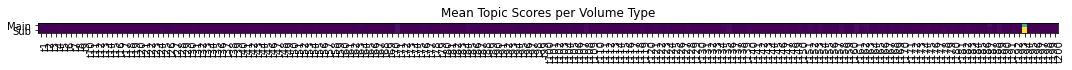

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.imshow(Volume_TypeMeans.values)

ax.set_xticks(np.arange(len(Volume_TypeMeans.columns)))
ax.set_yticks(np.arange(len(Volume_TypeMeans.index)))

ax.set_xticklabels(Volume_TypeMeans.columns)
ax.set_yticklabels(Volume_TypeMeans.index)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

ax.set_title("Mean Topic Scores per Volume Type")
fig.tight_layout()
plt.show()

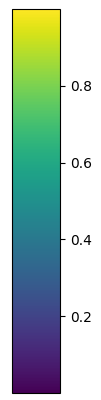

### Trimesters

In [54]:
#Making the Trimester Column Numeric
df_CotEA = df_CotE[df_CotE["Trimester"] == "1"]
df_CotEB = df_CotE[df_CotE["Trimester"] == "2"]
df_CotEC = df_CotE[df_CotE["Trimester"] == "3"]
df_CotED = df_CotE[df_CotE["Trimester"] == "4"]
df_CotE = df_CotEA.append(df_CotEB, ignore_index=True)
df_CotE = df_CotE.append(df_CotEC, ignore_index=True)
df_CotE = df_CotE.append(df_CotED, ignore_index=True)
df_CotE.head()

df_CotE["Trimester"] = df_CotE[["Trimester"]].apply(pd.to_numeric)
df_CotE["Trimester"].head()

C:\Users\morin\AppData\Local\Temp\ipykernel_4540\3393142430.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_CotE = df_CotEA.append(df_CotEB, ignore_index=True)
C:\Users\morin\AppData\Local\Temp\ipykernel_4540\3393142430.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_CotE = df_CotE.append(df_CotEC, ignore_index=True)
C:\Users\morin\AppData\Local\Temp\ipykernel_4540\3393142430.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_CotE = df_CotE.append(df_CotED, ignore_index=True)


0    1
1    1
2    1
3    1
4    1
Name: Trimester, dtype: int64

In [55]:
df_scores = pd.DataFrame(scoresCotE, columns=[f't{i+1}' for i in range(scores.shape[1])])
Trimester_Topics = df_CotE[["Trimester"]].join(df_scores)
Trimester_Topics.head()

,Trimester,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200
0,1,0.0,0.000000,0.0,0.0,0.000000,0.008521,0.0,0.000000,0.000000,...,0.010555,0.0,0.000000,0.000000,0.0,0.000000,0.006816,0.0,0.0,0.176385
1,1,0.0,0.000000,0.0,0.0,0.001578,0.000000,0.0,0.006685,0.002027,...,0.021260,0.0,0.046023,0.000000,0.0,0.000478,0.000000,0.0,0.0,0.000000
2,1,0.0,0.007731,0.0,0.0,0.008181,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,1,0.0,0.000000,0.0,0.0,0.018237,0.000000,0.0,0.007925,0.010185,...,0.000000,0.0,0.000000,25.158973,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.021680,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [56]:
TrimesterMeans = Trimester_Topics.groupby("Trimester").mean()
TrimesterMeans

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200
Trimester,,,,,,,,,,,,,,,,,,,,,
1,0.022906,0.001564,0.036699,0.003939,0.003950,0.002102,0.000000,0.001029,0.001855,0.001123,...,0.013416,0.022488,0.005397,5.084491,0.000638,0.007221,0.002839,0.003861,0.004577,0.035326
2,0.052651,0.014337,0.024068,0.000192,0.016006,0.000469,0.000313,0.000474,0.001618,0.000690,...,0.009099,0.009149,0.008102,5.943903,0.000000,0.004806,0.008414,0.000949,0.003709,0.019767
3,0.027124,0.025125,0.009032,0.003071,0.014470,0.002230,0.000044,0.004270,0.001942,0.000404,...,0.012479,0.029499,0.012454,2.780218,0.002514,0.004097,0.002600,0.005129,0.006813,0.067004
4,0.075407,0.037220,0.000975,0.000270,0.014862,0.005745,0.000092,0.002098,0.001275,0.001071,...,0.006197,0.059451,0.007423,0.436548,0.000000,0.002872,0.002656,0.001731,0.022087,0.034039


In [57]:
TrimesterMeans.loc[1].sort_values(ascending=False).head()

t194    5.084491
t161    0.142407
t187    0.130857
t152    0.129971
t71     0.106405
Name: 1, dtype: float64

In [58]:
TrimesterMeans.loc[2].sort_values(ascending=False).head()

t194    5.943903
t71     0.329971
t161    0.124645
t136    0.121122
t163    0.118699
Name: 2, dtype: float64

In [61]:
TrimesterMeans.loc[3].sort_values(ascending=False).head(25)

t194    2.780218
t189    0.204397
t71     0.177060
t108    0.137542
t136    0.126720
t163    0.116411
t187    0.107073
t85     0.074476
t119    0.071696
t200    0.067004
t158    0.059388
t166    0.054343
t64     0.053064
t168    0.044660
t162    0.043193
t122    0.041117
t37     0.037939
t154    0.037865
t183    0.037415
t178    0.036077
t161    0.035855
t111    0.035674
t97     0.033270
t63     0.032079
t128    0.029600
Name: 3, dtype: float64

In [485]:
TrimesterMeans.loc[4].sort_values(ascending=False).head()

t194    0.436548
t71     0.245374
t187    0.179674
t161    0.168212
t163    0.108023
Name: 4, dtype: float64

#### Kendall's Tau Statistic 

In [486]:
from operator import itemgetter
from scipy.stats import kendalltau

ranks = range(1, len(TrimesterMeans.index)+1)
tau_scoresTrimester = []
for col in [f't{i+1}' for i in range(TrimesterMeans.shape[1])]:
    tau, p = kendalltau(ranks, TrimesterMeans[col].tolist())
    tau_scoresTrimester.append((col, tau))
    
tau_scoresTrimester.sort(key=itemgetter(1))
nb = 8
top, bottom = tau_scoresTrimester[:nb], tau_scores[-nb:]

tau_scoresTrimester


#('t194', -0.6666666666666669) 
#('t152', -0.3333333333333334)
#('t136', 0.0), ('t161', 0.0), ('t163', 0.0)
#('t71', 0.3333333333333334), ('t108', 0.3333333333333334), ('t187', 0.3333333333333334), ('t189', 0.3333333333333334)

The top decreasing topics are: [('t3', -1.0), ('t14', -1.0), ('t15', -1.0), ('t32', -1.0), ('t33', -1.0), ('t41', -1.0), ('t42', -1.0), ('t75', -1.0)]
 and 
the top increasing topics are:[('t49', 1.0), ('t64', 1.0), ('t105', 1.0), ('t107', 1.0), ('t112', 1.0), ('t162', 1.0), ('t166', 1.0), ('t181', nan)]


[('t3', -1.0),
 ('t14', -1.0),
 ('t15', -1.0),
 ('t32', -1.0),
 ('t33', -1.0),
 ('t41', -1.0),
 ('t42', -1.0),
 ('t75', -1.0),
 ('t79', -1.0),
 ('t104', -1.0),
 ('t123', -1.0),
 ('t126', -1.0),
 ('t158', -1.0),
 ('t164', -1.0),
 ('t196', -1.0),
 ('t40', -0.7071067811865477),
 ('t73', -0.7071067811865477),
 ('t121', -0.7071067811865477),
 ('t146', -0.7071067811865477),
 ('t19', -0.6666666666666669),
 ('t27', -0.6666666666666669),
 ('t28', -0.6666666666666669),
 ('t30', -0.6666666666666669),
 ('t45', -0.6666666666666669),
 ('t46', -0.6666666666666669),
 ('t52', -0.6666666666666669),
 ('t55', -0.6666666666666669),
 ('t59', -0.6666666666666669),
 ('t65', -0.6666666666666669),
 ('t68', -0.6666666666666669),
 ('t77', -0.6666666666666669),
 ('t80', -0.6666666666666669),
 ('t82', -0.6666666666666669),
 ('t84', -0.6666666666666669),
 ('t99', -0.6666666666666669),
 ('t103', -0.6666666666666669),
 ('t135', -0.6666666666666669),
 ('t137', -0.6666666666666669),
 ('t149', -0.6666666666666669),
 ('t1

In [265]:
topic_word_distributions.loc['Topic 194'].sort_values(ascending=False).head(15)

read       0.323855
cold       0.193831
books      0.157890
hot        0.156453
great      0.153961
gave       0.152888
nobody     0.152649
care       0.144422
large      0.142725
found      0.141327
evening    0.136097
odd        0.133360
miss       0.129170
give       0.115100
clothes    0.111127
Name: Topic 194, dtype: float64

In [266]:
topic_word_distributions.loc['Topic 161'].sort_values(ascending=False).head(15)

exam          0.155086
matter        0.152910
trust         0.121051
seem          0.087718
pace          0.078721
lately        0.068282
feel          0.065090
respect       0.062443
deep          0.061312
knock         0.059029
getting       0.054525
knocked       0.053083
yesterday     0.046569
especially    0.045880
reply         0.043426
Name: Topic 161, dtype: float64

In [267]:
topic_word_distributions.loc['Topic 187'].sort_values(ascending=False).head(15)

master    0.186082
man       0.183532
notes     0.166460
game      0.159992
paper     0.157662
read      0.127777
dear      0.118591
part      0.118422
rules     0.117948
miss      0.112802
brown     0.111822
book      0.110964
rather    0.110554
remark    0.105480
seat      0.105274
Name: Topic 187, dtype: float64

In [268]:
topic_word_distributions.loc['Topic 152'].sort_values(ascending=False).head(15)

shop       0.097717
speak      0.052502
window     0.046096
voice      0.039967
ah         0.037324
replied    0.036260
wild       0.033117
saw        0.028346
bring      0.027532
society    0.025674
fond       0.024381
slowly     0.024075
removed    0.023214
hundred    0.021344
poor       0.019279
Name: Topic 152, dtype: float64

In [270]:
topic_word_distributions.loc['Topic 71'].sort_values(ascending=False).head(15)

hair        1.878448
change      0.634323
happened    0.471495
love        0.410540
short       0.353760
shall       0.345200
surprise    0.318643
grow        0.282919
everyone    0.249825
possibly    0.235232
fine        0.232223
lightly     0.224945
reach       0.213041
anything    0.200327
events      0.199592
Name: Topic 71, dtype: float64

In [271]:
topic_word_distributions.loc['Topic 136'].sort_values(ascending=False).head(15)

study       0.473605
managed     0.419385
mean        0.363004
points      0.301016
remember    0.238854
idea        0.222566
decided     0.196586
saying      0.194873
natural     0.188482
stand       0.187288
answer      0.182946
play        0.175508
serious     0.173508
became      0.168864
done        0.161854
Name: Topic 136, dtype: float64

In [272]:
topic_word_distributions.loc['Topic 163'].sort_values(ascending=False).head(15)

lines      0.741388
trust      0.649635
got        0.400291
public     0.319608
sir        0.263679
house      0.251998
ring       0.221155
food       0.196416
water      0.191979
stuff      0.182339
work       0.172072
bed        0.165866
look       0.164441
boys       0.163274
brother    0.148422
Name: Topic 163, dtype: float64

In [273]:
topic_word_distributions.loc['Topic 189'].sort_values(ascending=False).head(15)

walking      2.778360e-01
wondering    7.772794e-02
change       1.330604e-02
far          1.162973e-02
rapid        8.432298e-06
pleasure     1.203766e-06
interview    1.022158e-06
future       9.462102e-07
admit        6.585153e-07
wo           5.677818e-07
listen       3.691072e-07
read         2.895946e-07
taken        2.348785e-07
afraid       1.944210e-07
sharp        1.678070e-07
Name: Topic 189, dtype: float64

In [274]:
topic_word_distributions.loc['Topic 108'].sort_values(ascending=False).head(15)

room        0.929792
door        0.898167
floor       0.538911
quickly     0.518587
wearing     0.389711
stairs      0.389710
waste       0.381636
fresh       0.359266
whatever    0.352376
clothes     0.352330
sight       0.345717
returned    0.345701
straight    0.333075
enough      0.321162
done        0.315556
Name: Topic 108, dtype: float64

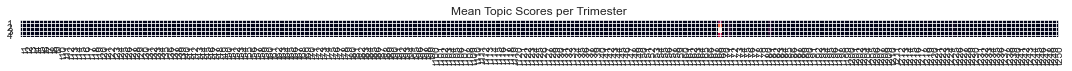

In [144]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.imshow(TrimesterMeans.values)

ax.set_xticks(np.arange(len(TrimesterMeans.columns)))
ax.set_yticks(np.arange(len(TrimesterMeans.index)))

ax.set_xticklabels(TrimesterMeans.columns)
ax.set_yticklabels(TrimesterMeans.index)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

ax.set_title("Mean Topic Scores per Trimester")
fig.tight_layout()
plt.show()

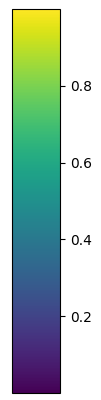

## Extra Data Visualisation

### WordCloud

In [54]:
#Wordcloud made in google colab since is not supported for python version 3.7 & above

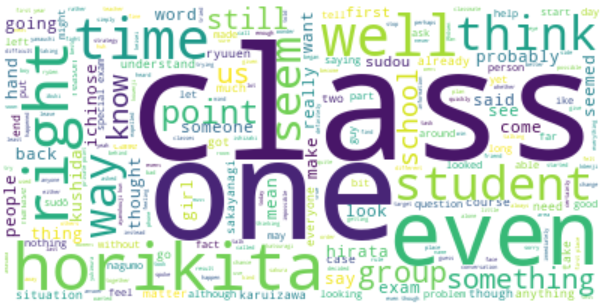

### Keyword Extraction

In [55]:
!pip install keybert

In [56]:
from keybert import KeyBERT
kw_model = KeyBERT()

In [69]:
df_CotE["Keywords"] = df_CotE['Clean_Text'].apply(kw_model.extract_keywords)

In [73]:
df_CotE["Keywords"]

0      [(disabilities, 0.3421), (society, 0.293), (eq...
1      [(lonely, 0.4221), (talking, 0.3905), (self, 0...
2      [(icarus, 0.418), (mythology, 0.3652), (greek,...
3      [(suffering, 0.3924), (youth, 0.3865), (suffer...
4      [(ayanokouji, 0.3397), (koenji, 0.2975), (roku...
                             ...                        
106    [(kitou, 0.346), (sakayanagi, 0.3057), (utomiy...
107    [(horikita, 0.3505), (exams, 0.3403), (exam, 0...
108    [(classes, 0.3485), (students, 0.3472), (class...
109    [(ichinose, 0.3234), (hashimoto, 0.3192), (tas...
110    [(students, 0.3747), (student, 0.2958), (grade...
Name: Keywords, Length: 111, dtype: object

In [74]:
df_CotE["Keywords"][0]

[('disabilities', 0.3421),
 ('society', 0.293),
 ('equality', 0.2234),
 ('unequal', 0.2057),
 ('disabled', 0.1949)]

In [75]:
df_CotE["Clean_Text"][0]

'bit sudden listen seriously question ask think answer carefully question people equal days society loves talk equality people calling men women treated equally shouting society get rid inequality call high employment rates women personal use cars everyone go far find fault order register names people even advocate equality people disabilities public encouraged stop using term disabled people children taught everyone equal really true wondered men women different roles different abilities people disabilities still disabled matter term call disabled people none meaning one pays attention words answer people unequal beings truly equal people great man said god make anyone mean everyone equal know passage end rest like everyone equal birth asked differences people jobs statuses written second half passage difference one struggled academics one try hard enough difference created famous scholarship studies teachings changed even modern day however situation complex becoming serious anyhow p